<a href="https://colab.research.google.com/github/Ruchiiika/Cloud/blob/main/ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np

In [7]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [8]:
df=pd.read_csv("/content/drive/MyDrive/emails.csv")

In [9]:
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [10]:
df.isnull().sum()

,0
Email No.,0
the,0
to,0
ect,0
and,0
...,...
military,0
allowing,0
ff,0
dry,0


In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

,0
Email No.,0
the,0
to,0
ect,0
and,0
...,...
military,0
allowing,0
ff,0
dry,0


In [13]:
print(df.columns)

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)


In [14]:
x=df.drop(['Email No.','Prediction'],axis=1)
y=df['Prediction']

<Axes: xlabel='Prediction', ylabel='count'>

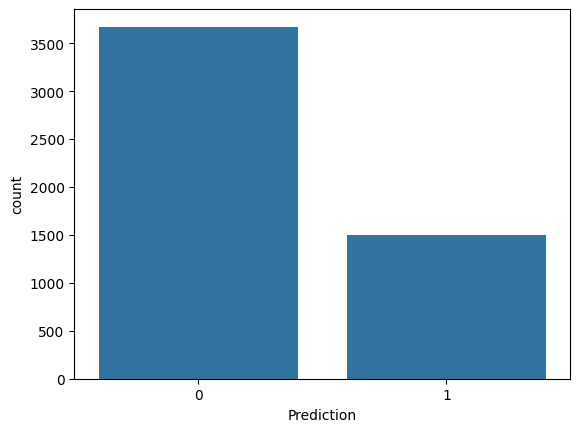

In [15]:
sns.countplot(x=y)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=42)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
x.shape

(5172, 3000)

In [26]:
x_train.shape

(4396, 3000)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_scaled,y_train)
KNeighborsClassifier()
y_pred=knn.predict(x_test_scaled)

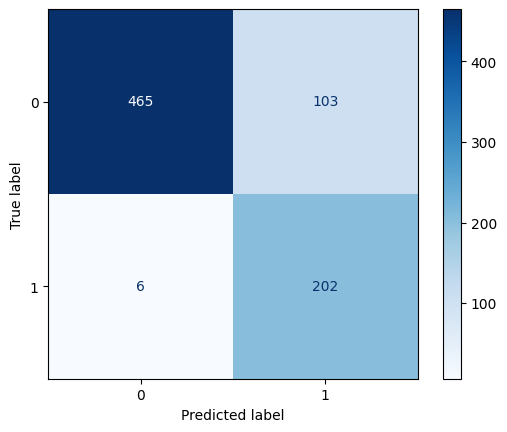

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap='Blues')

In [29]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
acc=accuracy_score(y_test,y_pred)
acc

0.8595360824742269

In [30]:
error_rate=1-acc
error_rate

0.14046391752577314

In [31]:
precision=precision_score(y_test,y_pred)
precision

0.6622950819672131

In [32]:
recall=recall_score(y_test,y_pred)

In [33]:
recall

0.9711538461538461

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90       568
           1       0.66      0.97      0.79       208

    accuracy                           0.86       776
   macro avg       0.82      0.89      0.84       776
weighted avg       0.90      0.86      0.87       776



In [41]:
error=[]
for k in range(1,41):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_scaled,y_train)
  y_pred=knn.predict(x_test_scaled)
  err=1-accuracy_score(y_test,y_pred)
  error.append(err)
  print(f"{k}={err}")

1=0.09922680412371132
2=0.08634020618556704
3=0.12113402061855671
4=0.10567010309278346
5=0.14046391752577314
6=0.13144329896907214
7=0.1701030927835051
8=0.16881443298969068
9=0.19072164948453607
10=0.18556701030927836
11=0.2139175257731959
12=0.20876288659793818
13=0.23969072164948457
14=0.23324742268041232
15=0.2538659793814433
16=0.24613402061855671
17=0.2680412371134021
18=0.2641752577319587
19=0.28350515463917525
20=0.2809278350515464
21=0.28737113402061853
22=0.28865979381443296
23=0.3028350515463918
24=0.30154639175257736
25=0.31829896907216493
26=0.31829896907216493
27=0.3260309278350515
28=0.32474226804123707
29=0.33762886597938147
30=0.33762886597938147
31=0.3479381443298969
32=0.34536082474226804
33=0.3492268041237113
34=0.3479381443298969
35=0.3530927835051546
36=0.3492268041237113
37=0.3582474226804123
38=0.3569587628865979
39=0.3621134020618557
40=0.3621134020618557


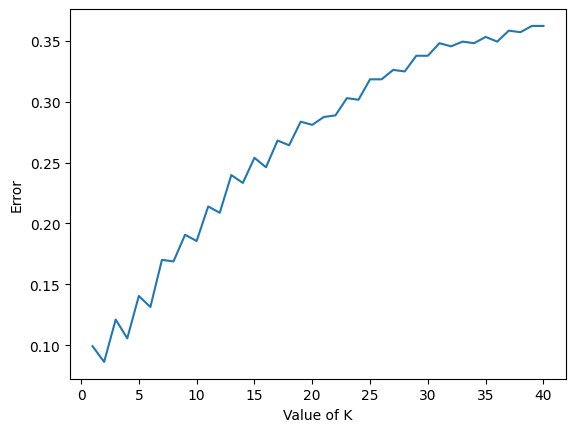

In [43]:
import matplotlib.pyplot as plt
plt.xlabel('Value of K')
plt.ylabel('Error')
plt.plot(range(1,41),error)
plt.show()

In [44]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_scaled,y_train)
y_pred=knn.predict(x_test_scaled)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       568
           1       0.82      0.86      0.84       208

    accuracy                           0.91       776
   macro avg       0.89      0.90      0.89       776
weighted avg       0.92      0.91      0.91       776



In [46]:
from sklearn.svm import SVC
svm=SVC(kernel='poly')
svm.fit(x_scaled,y_train)
SVC(kernel='poly')
y_pred2=svm.predict(x_test_scaled)
acc1=accuracy_score(y_test,y_pred2)
acc1

0.779639175257732

In [47]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf')
svm.fit(x_scaled,y_train)
SVC(kernel='rbf')
y_pred3=svm.predict(x_test_scaled)
acc2=accuracy_score(y_test,y_pred3)
acc2

0.9639175257731959

In [48]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(x_scaled,y_train)
SVC(kernel='linear')
y_pred4=svm.predict(x_test_scaled)
acc3=accuracy_score(y_test,y_pred4)
acc3

0.9587628865979382